<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Создание признаков</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Валидация-данных" data-toc-modified-id="Валидация-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Валидация данных</a></span></li><li><span><a href="#Масштабирование-данных" data-toc-modified-id="Масштабирование-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Масштабирование данных</a></span></li><li><span><a href="#Базовая-модель-(Dummy-model)" data-toc-modified-id="Базовая-модель-(Dummy-model)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Базовая модель (Dummy model)</a></span></li><li><span><a href="#Модель-линейной-регрессии-(LR)" data-toc-modified-id="Модель-линейной-регрессии-(LR)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель линейной регрессии (LR)</a></span></li><li><span><a href="#Модель-случайного-леса-(RF)" data-toc-modified-id="Модель-случайного-леса-(RF)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель случайного леса (RF)</a></span></li><li><span><a href="#Модель-градиентного-бустинга-LightGBM" data-toc-modified-id="Модель-градиентного-бустинга-LightGBM-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Модель градиентного бустинга LightGBM</a></span></li><li><span><a href="#Модель-градиентного-бустинга-CatBoost" data-toc-modified-id="Модель-градиентного-бустинга-CatBoost-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Модель градиентного бустинга CatBoost</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Основные-выводы" data-toc-modified-id="Основные-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Основные выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

В работе необходимо построить модель, которая на основании исторических данных сможет спрогнозировать количество заказов такси в аэропорту на следующий час.
Основная задача проекта заключается в разработке метода преобразования данных.

 **Цель исследования**
 
Цель проекта заключается в разработке модель, которая на основании исторических данных сможет спрогнозировать количество заказов такси в аэропорту на следующий час. 

**Ход исследования**

Данные для исследования получены из одного датафрейма. В нашем распоряжении данные времени и колечестве заказов такси .

Таким образом, исследование будет состоять из следующих этапов:
- обзор данных;
- предобработка данных (при необходимости);
- анализ данных;
- обучение разных моделей с разными гиперпараметрами;
- применение метода преобразования данных;
- проверка лучшей модели на тестовой выборке;
- основные выводы.

## Подготовка

In [1]:
# импорт основных библиотек
import os
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# импорт спец. модули
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")

# константы
RANDOM_STATE = 42

In [2]:
try:
    df = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0]) 
except:
    df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
display(df.head(), df.shape)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


(26496, 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
df.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_orders,26496.0,14.070463,9.21133,0.0,8.0,13.0,19.0,119.0


Проверим данные на пропуски.

In [7]:
df.isna().sum()

num_orders    0
dtype: int64

In [8]:
df.sort_index(inplace=True)

Проверим индекс на монотонность.

In [9]:
df.index.is_monotonic

True

Построим график с количеством заказов.

<AxesSubplot:xlabel='datetime'>

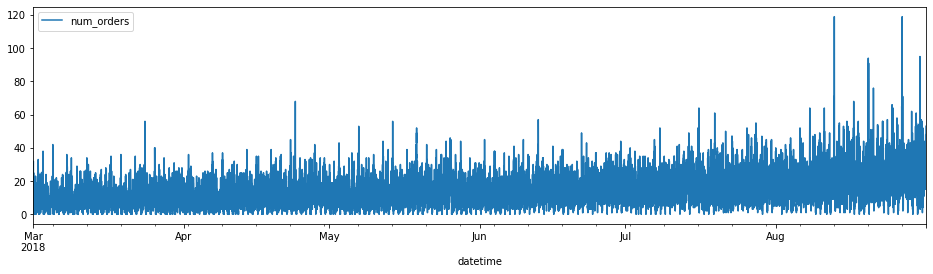

In [10]:
plt.figure(figsize=(16, 4))
df.plot(ax=plt.gca())

Вывод

Были загружены данные с начала марта 2018 по конец августа. Данные были проверены на пропуски и монотонность. Пропуски отсутствуют, данные расположены в хронологическом порядке.

## Анализ

Для начала проведём ресемплирование по одному часу.

<AxesSubplot:xlabel='datetime'>

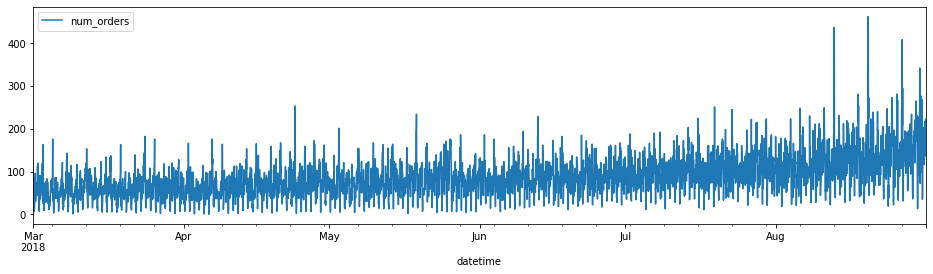

In [11]:
plt.figure(figsize=(16, 4))
df = df.resample('1H').sum()
df.plot(ax=plt.gca())

Проведем анализ распределения целевого показателя.

In [12]:
def draw(data, col):
    Q1 = np.quantile(data[col], 0.25, interpolation='midpoint')
    Q3 = np.quantile(data[col], 0.75, interpolation='midpoint')
    IQR = Q3 - Q1
    
    plt.figure(figsize=(15,.5))
    sns.boxplot(data[col]).set(xlim = [Q1-3*(Q3-Q1), Q3+3*(Q3-Q1)])
    plt.show()
    
    plt.figure(figsize=(15,3))
    sns.distplot(data[col])
    plt.show()

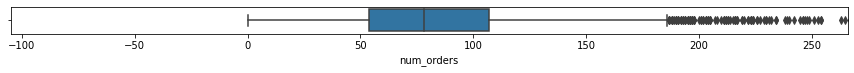

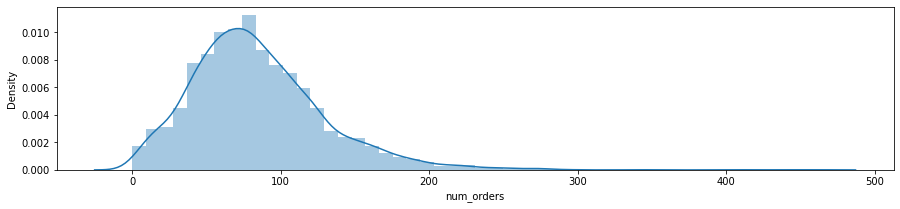

In [13]:
draw(df, 'num_orders')

In [14]:
df[df['num_orders'] > 200].count()

num_orders    81
dtype: int64

Имеем жирнохвостовое распределение, при этом значений с большим количеством заказов не много, это может быть связано с праздниками или какими-то мероприятиями в городе, повлекшими дополнительный поток туристов. Удалать данные не имеет смысла.

Проведем декомпозицию для оценки трендов и сезонности.

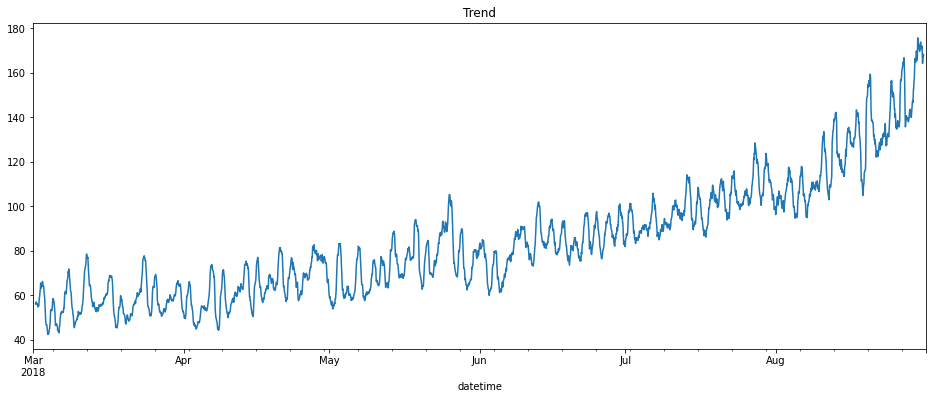

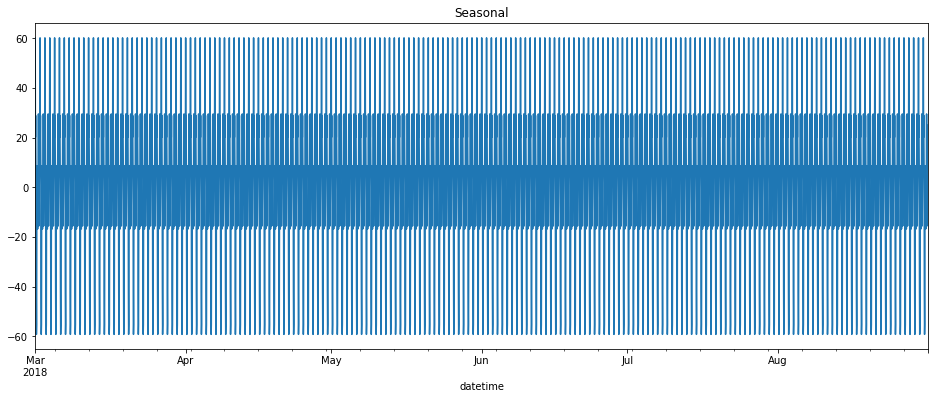

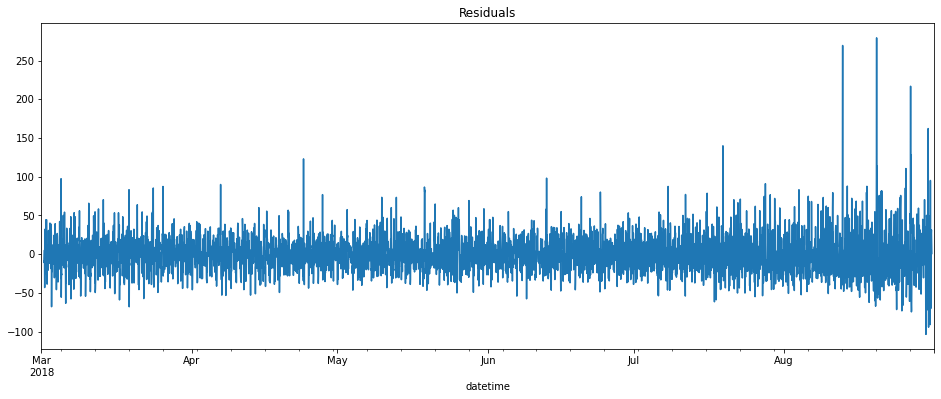

In [15]:
decomposed = seasonal_decompose(df['num_orders'])

trend = decomposed.trend
trend.plot(figsize=(16,6),ax=plt.gca())
plt.title('Trend')
plt.show()

seasonal = decomposed.seasonal
seasonal.plot(figsize=(16,6),ax=plt.gca())
plt.title('Seasonal')
plt.show()

residuals = decomposed.resid
residuals.plot(figsize=(16,6),ax=plt.gca())
plt.title('Residuals')
plt.show()

На графике тренда видно увеличение количество заказов такси с каждым месяцом.
На графике сезонности видны повторяющиеся закономерности в ряду. Слишком частая частота, необходимо рассмотреть более приблеженно.

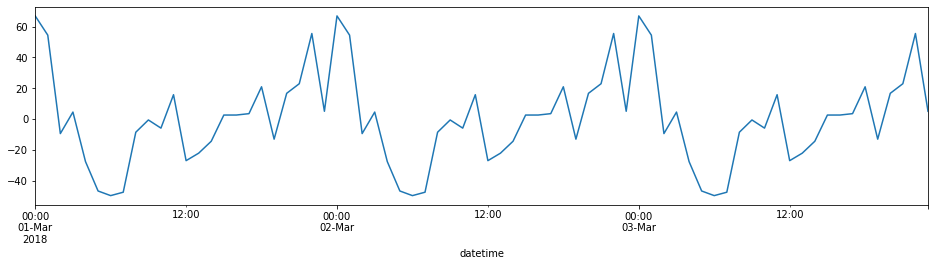

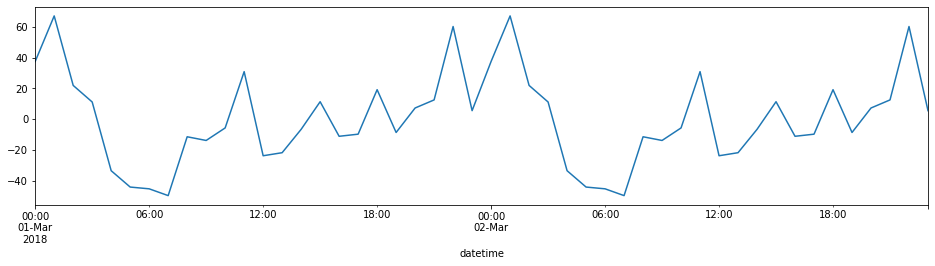

In [16]:
# Сезонность внутри 2 дней
plt.figure(figsize=(16,8))
decomposed_2day = seasonal_decompose(df['2018-03-01':'2018-03-03'])
plt.title('Сезонность')
plt.subplot(211)
decomposed_2day.seasonal.plot(ax=plt.gca())
plt.show()

# Сезонность внутри 1 дня
plt.figure(figsize=(16,8))
decomposed_1day = seasonal_decompose(df['2018-03-01':'2018-03-02'])
plt.title('Сезонность')
plt.subplot(211)
decomposed_1day.seasonal.plot(ax=plt.gca())
plt.show()

Можно заметить повторяющиеся закономерности в ряду в течении каждого дня. Теперь можно сказать - максимальная загрузка в районе 00:00, спад до ~06:00 (минимальная загрузка), с дальнейшем не плавным ростом до 00:00.

Посмотрим как ведут себя недели в течении месяца.

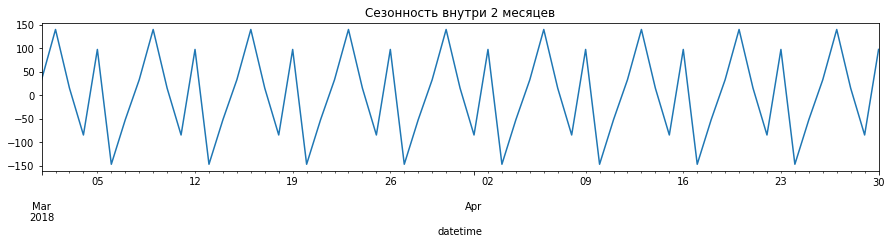

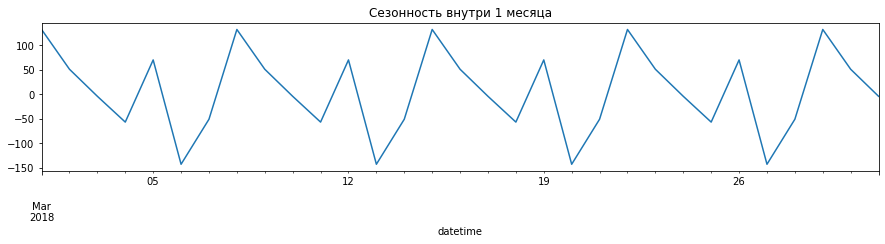

In [17]:
# Сезонность внутри 2 месяцев
plt.figure(figsize=(15, 6))
decomposed = seasonal_decompose(df['2018-03-01':'2018-04-30'].resample('1D').sum())
plt.subplot(211)
plt.title('Сезонность внутри 2 месяцев')
decomposed.seasonal.plot(ax=plt.gca())
plt.show()


# Сезонность внутри 1 месяца
plt.figure(figsize=(15, 6))
decomposed = seasonal_decompose(df['2018-03-01':'2018-03-31'].resample('1D').sum())
plt.subplot(211)
plt.title('Сезонность внутри 1 месяца')
decomposed.seasonal.plot(ax=plt.gca())
plt.show()

Теперь можно сказать - максимальная загрузка в понедельник( номер 0), минимальная загрузка - суббота( номер 06), очен хороший спрос в пятницу( номер 05), что логично, так как люди прилетают из командировок или едут с туристическими целями.

Определили дневную сезонность - максимальная загрузка в понедельник, минимальная загрузка - суббота, очен хороший спрос в пятницу. Определили суточную сезонность - максимальная загрузка в районе 00:00, спад до ~06:00 (минимальная загрузка), с дальнейшем не плавным ростом до 00:00.
Про месячную сезонность - нельзя ничего говорить, данные не за полный год.
Определили тренд - рост с каждым месяцем. Но данные не полные, рост может быть связан с временем года.

Проверим, к какому типу принадлежит наш временной ряд.

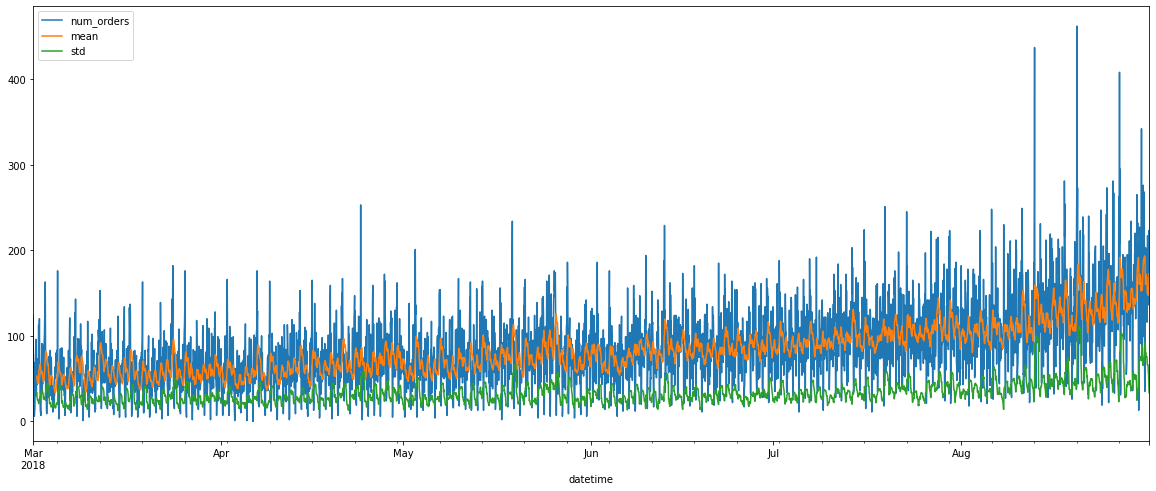

In [18]:
df['mean'] = df['num_orders'].shift().rolling(15).mean()
df['std'] = df['num_orders'].shift().rolling(15).std()
df.plot(figsize=(20,8));

Скользящее среднее отклонение со временем изменяеся не слишком сильно. При этом среднее значение - достаточно высоко поднимется в августе.

In [19]:
df = df.drop(['mean','std'], axis=1)

Сгруппируем данные по дням и найдем скользящее среднее, чтобы оценить общую динамику изменений количества заказов.

In [20]:
df_new = df.copy()
df_new = df_new.resample('1D').sum()
df_new['rolling_mean'] = df_new['num_orders'].rolling(5).mean()
df_new = df_new.dropna()

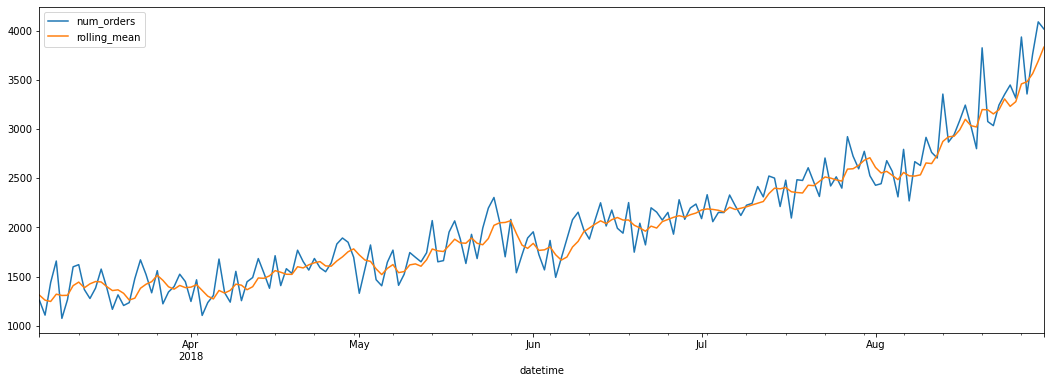

In [21]:
df_new[['num_orders', 'rolling_mean']].plot(figsize=(18, 6))
plt.show()

График стал более читабелен и из него можно сделать вывод, что присутствует тренд на увеличение количества заказов такси от месяца к месяцу.

Проверим ряд на стационарность тестом Дики - Фуллера.

Проверим следующие нулевую и альтернативную гипотезы:

H 0 : Временной ряд является нестационарным. Другими словами, он имеет некоторую структуру, зависящую от времени, и не имеет постоянной дисперсии во времени.

H A : временной ряд является стационарным.

Если p-значение из теста меньше некоторого уровня значимости (например, α = 0,05), то мы можем отвергнуть нулевую гипотезу и сделать вывод, что временной ряд является стационарным.

In [22]:
pip install statsmodels -q

Note: you may need to restart the kernel to use updated packages.


In [23]:
from statsmodels. tsa.stattools import adfuller

In [24]:
adfuller(df)

(-3.0689242890279558,
 0.028940051402612906,
 30,
 4385,
 {'1%': -3.431842162413052,
  '5%': -2.8621993540813637,
  '10%': -2.567120978470452},
 41728.71357827463)

Значение α = 0,028, следовательно отвергаем нулевую гипотезу и делаем вывод, что временной ряд является стационарным.

### Создание признаков

Поскольку в исходных данных присутствует только одна колонка, которой недостаточно для точного предсказания, данные будут деконструированы и перезаписаны в отдельные колонки.

Из количества заказов будут выделены:
отстающие признаки - это количество заказов за несколько предыдущих часов*;
скользящее среднее - это среднее количество заказов за несколько ближайших часов*.
Из момента времени 2018-06-18 07:00:00 будут выделены календарные признаки:

месяц (Март - Август);

день месяца (1 - 31);

день недели (0 - 6 / "Понедельник" - "Воскресенье");

час (0 - 23).

*количество часов подбирается в зависимости от данных

Пояснения по выбранным факторам:

1) Фактор год: НЕТ. Данных собраны за один год. Поэтому будет просто константа.

2) Фактор месяц: НЕТ, так как в будущем будет приводить к ошибкам.

3) Фактор день: НЕТ (возможно), поскольку присутствует день недели, который куда более информативен.

4) Фактор день недели: ДА, т.к. присутствует недельная сезонность.

5) Фактор час: ДА.

6) Факто lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.

7) Фактор rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда.

8) Фактор std: НЕТ, при реальном использовании в бизнесе нет возможности узнать разброс среднего в будущем.

Ниже описана функция формирующая новые признаки.

In [25]:
def make_features(df, max_lag, window_size):
    
    # отстающие (предыдущие) признаки / lag features
    for lag in range (1, max_lag+1):
        df['num_orders_{}'.format(lag)] = df['num_orders'].shift(periods=lag, fill_value=df.iloc[-1, lag-1])
    
    # скользящее среднее / rolling mean
    df['rolling_mean'] = df['num_orders'].shift().rolling(window_size).mean()
    
    # календарные признаки / calendar features
    df['month']     = df.index.month
    df['dayofweek'] = df.index.dayofweek
    df['day']       = df.index.day
    df['hour']      = df.index.hour
    
    # удаление новообразованных пустых объектов
    df.dropna(inplace=True)

## Обучение

### Валидация данных

Деление исходного датасета на 3 выборки под разные задачи:

Тренировочная (80%) — на её объектах модель будет обучена;
Валидационная (10%) — на её объектах модель будет контролироваться и корректироваться её обучение;
Тестовая (10%) — на её объектах будет произведён итоговый тест для оценки качества модели.
Поскольку выборка относительно небольшая и увеличивать её - означает потеря актуальности, для подбора гиперпараметров моделей будет использована кросс вылидация, с сохранением временной последовательности.

In [26]:
# выделение признаков
make_features(df, max_lag=2, window_size=3)
display(df_new.head())
target = df['num_orders']
features = df.drop(['num_orders'], axis=1)

# выделение тренировочной выборки
X_train, X_other, Y_train, Y_other = train_test_split(features,
                                                      target,
                                                      shuffle = False,
                                                      train_size = 0.80,
                                                      random_state = RANDOM_STATE)
# выделение валидационной и тестовой выборок
X_valid, X_test,  Y_valid, Y_test  = train_test_split(X_other,
                                                      Y_other,
                                                      shuffle = False,
                                                      test_size = 0.50,
                                                      random_state = RANDOM_STATE)

,num_orders,rolling_mean
datetime,,
2018-03-05,1259,1312.0
2018-03-06,1109,1261.0
2018-03-07,1441,1248.0
2018-03-08,1659,1321.8
2018-03-09,1076,1308.8


### Масштабирование данных

Сформированные выборки необходимо подготовить к обучению, поскольку в текущем формате модель будет работать не корректно. Численные данные необходимо привести к единому масштабу, с помощью техники Standard Scaler. Благодаря этому все признаки будут иметь одинаковую значимость.

In [27]:
# масштабирование признаков
numeric = ['num_orders_1', 'num_orders_2']     

scaler = StandardScaler()
scaler.fit(X_train[numeric])
for features in [X_train, X_valid, X_test]:
    features[numeric] = scaler.transform(features[numeric])

display(X_train.head())

,num_orders_1,num_orders_2,rolling_mean,month,dayofweek,day,hour
datetime,,,,,,,
2018-03-01 03:00:00,-0.092124,0.300437,93.333333,3,3,1,3
2018-03-01 04:00:00,-0.232113,-0.091724,74.000000,3,3,1,4
2018-03-01 05:00:00,-0.876067,-0.231781,60.000000,3,3,1,5
2018-03-01 06:00:00,-1.911992,-0.876045,38.333333,3,3,1,6
2018-03-01 07:00:00,-1.744004,-1.912469,20.333333,3,3,1,7


### Базовая модель (Dummy model)

Это простейшая "модель", которая делает константное или примитивное предсказание. Её роль заключается в том, чтобы получить ориентир для сравнения качества применяемых моделей: их оценка должна быть ниже, чем оценка базовой модели.

Предсказать среднее.

In [28]:
pred = np.ones(len(X_test)) * df['num_orders'].mean()
rmse = mean_squared_error(Y_test, pred) ** 0.5 
print('Значение метрики RMSE: {:.1f}'.format(rmse))

Значение метрики RMSE: 80.4


Предсказать предыдущее значение.

In [29]:
pred = Y_test.shift(fill_value = Y_train.iloc[-1])
rmse = mean_squared_error(Y_test, pred) ** 0.5 
print('Значение метрики RMSE: {:.1f}'.format(rmse))

Значение метрики RMSE: 58.9


### Модель линейной регрессии (LR)

Это достаточно простая модель предсказывания, что является её и слабой и сильной стороной. Она проста в настройке, и выделяется высоким быстродействием. Особенно, если данные закодированы с помощью техники One Hot Encoding. Но может давать не такой точный результат, по сравнению с более сложными моделями.

In [30]:
%%time

model = LinearRegression()
model.fit(X_train, Y_train)
prediction = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(Y_valid, prediction))
print('Минимальное значение RMSE: {:.1f}'.format(rmse))

Минимальное значение RMSE: 40.8
CPU times: user 7.9 ms, sys: 0 ns, total: 7.9 ms
Wall time: 5.2 ms


### Модель случайного леса (RF)

Ансамбль (набор) моделей решающих деревьев. Преимущество заключается в том, что вместе модели ошибаются в среднем не так сильно как по отдельности. Из ключевых параметров Случайного леса: количество деревьев и их глубина.

In [31]:
rfm = RandomForestRegressor(random_state=RANDOM_STATE)
param_set = {'max_depth':[1, 2, 3], 'n_estimators':[10, 20, 40, 80, 120]} # перечень параметров модели и интересующие значения
tscv = TimeSeriesSplit(n_splits=8)
gsearch = GridSearchCV(rfm, param_grid=param_set, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=tscv, verbose=1)
GS_result = gsearch.fit(X_train, Y_train)

rfm = rfm.set_params(**GS_result.best_params_)
rfm.fit(X_train, Y_train)
prediction = rfm.predict(X_valid)
rmse = np.sqrt(mean_squared_error(Y_valid, prediction))
print('Минимальное значение RMSE: {:.1f}'.format(rmse))

best_RFM = rfm.set_params(**GS_result.best_params_)

t = %timeit -n10 -r10 -o rfm.fit(X_train, Y_train)
t = %timeit -n10 -r10 -o prediction = rfm.predict(X_valid)

Fitting 8 folds for each of 15 candidates, totalling 120 fits
Минимальное значение RMSE: 43.3
111 ms ± 1.78 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
3.35 ms ± 192 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


### Модель градиентного бустинга LightGBM

Последовательно построенный ансамбль моделей, каждая из которых учитывает ошибку предыдущей, и уменьшает её.

In [32]:
gbm = lgb.LGBMRegressor(random_state=RANDOM_STATE)
param_set = {'max_depth':[1, 2, 3], 'n_estimators':[10, 20, 40, 80, 120, 160]}
tscv = TimeSeriesSplit(n_splits=8)
gsearch = GridSearchCV(gbm, param_grid=param_set, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=tscv, verbose=1)
GS_result = gsearch.fit(X_train, Y_train)

gbm = gbm.set_params(**GS_result.best_params_)
gbm.fit(X_train, Y_train)
prediction = gbm.predict(X_valid)
rmse = np.sqrt(mean_squared_error(Y_valid, prediction))
print('Минимальное значение RMSE: {:.1f}'.format(rmse))

best_GBM = gbm.set_params(**GS_result.best_params_)

t = %timeit -n10 -r10 -o gbm.fit(X_train, Y_train)
t = %timeit -n10 -r10 -o prediction = gbm.predict(X_valid)

Fitting 8 folds for each of 18 candidates, totalling 144 fits
Минимальное значение RMSE: 32.5
The slowest run took 20.10 times longer than the fastest. This could mean that an intermediate result is being cached.
5.69 s ± 3.05 s per loop (mean ± std. dev. of 10 runs, 10 loops each)
106 ms ± 12 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


### Модель градиентного бустинга CatBoost

Еще одна всемирно признанная модель градиентного бустинга.

In [33]:
cbr = CatBoostRegressor(random_state=RANDOM_STATE)
param_set = {'max_depth':[1, 2, 3], 'n_estimators':[160]}
tscv = TimeSeriesSplit(n_splits=8)
gsearch = GridSearchCV(cbr, param_grid=param_set, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=tscv, verbose=1)
GS_result = gsearch.fit(X_train, Y_train)

cbr = cbr.set_params(**GS_result.best_params_)
cbr.fit(X_train, Y_train)
prediction = cbr.predict(X_valid)
rmse = np.sqrt(mean_squared_error(Y_valid, prediction))
print('Минимальное значение RMSE: {:.1f}'.format(rmse))


Fitting 8 folds for each of 3 candidates, totalling 24 fits
Learning rate set to 0.15679
0:	learn: 28.6453586	total: 45.8ms	remaining: 7.28s
1:	learn: 28.1318473	total: 46.1ms	remaining: 3.64s
2:	learn: 27.5063079	total: 46.1ms	remaining: 2.41s
3:	learn: 27.0453295	total: 46.2ms	remaining: 1.8s
4:	learn: 26.5546219	total: 46.3ms	remaining: 1.44s
5:	learn: 25.9926835	total: 46.4ms	remaining: 1.19s
6:	learn: 25.4825139	total: 46.5ms	remaining: 1.01s
7:	learn: 25.0654626	total: 46.6ms	remaining: 886ms
8:	learn: 24.5574580	total: 46.7ms	remaining: 784ms
9:	learn: 24.2092479	total: 46.8ms	remaining: 702ms
10:	learn: 23.9323775	total: 46.9ms	remaining: 635ms
11:	learn: 23.5317641	total: 47ms	remaining: 579ms
12:	learn: 23.2764512	total: 47ms	remaining: 532ms
13:	learn: 23.0687839	total: 47.1ms	remaining: 491ms
14:	learn: 22.8386091	total: 47.2ms	remaining: 457ms
15:	learn: 22.5045685	total: 47.3ms	remaining: 426ms
16:	learn: 22.3570146	total: 47.4ms	remaining: 399ms
17:	learn: 22.0885412	tot

In [34]:
t = %timeit -n10 -r10 -o cbr.fit(X_train, Y_train)
t = %timeit -n10 -r10 -o prediction = cbr.predict(X_valid)

Learning rate set to 0.221706
0:	learn: 33.1906271	total: 698us	remaining: 111ms
1:	learn: 31.0659436	total: 1.38ms	remaining: 109ms
2:	learn: 29.6459158	total: 1.9ms	remaining: 99.4ms
3:	learn: 28.7188241	total: 2.38ms	remaining: 92.8ms
4:	learn: 27.4127862	total: 2.86ms	remaining: 88.7ms
5:	learn: 26.8576730	total: 3.37ms	remaining: 86.6ms
6:	learn: 26.2123781	total: 3.84ms	remaining: 83.9ms
7:	learn: 25.7436940	total: 4.28ms	remaining: 81.2ms
8:	learn: 25.2274679	total: 4.72ms	remaining: 79.2ms
9:	learn: 25.0294428	total: 5.15ms	remaining: 77.2ms
10:	learn: 24.7906665	total: 5.59ms	remaining: 75.7ms
11:	learn: 24.6279211	total: 6.07ms	remaining: 74.8ms
12:	learn: 24.5127235	total: 6.54ms	remaining: 73.9ms
13:	learn: 24.2756485	total: 7ms	remaining: 73ms
14:	learn: 24.1646054	total: 7.45ms	remaining: 72ms
15:	learn: 23.9002535	total: 7.91ms	remaining: 71.2ms
16:	learn: 23.8089295	total: 8.39ms	remaining: 70.6ms
17:	learn: 23.6878421	total: 8.9ms	remaining: 70.2ms
18:	learn: 23.473729

Сравнение: Общее время работы моделей крайне мало, чтобы это могло иметь большое значение. Тем более в условиях поставленной задачи, где отсутствует об этом упоминание. Тем не менее я укажу это время в качестве справочной информации.

Линейная регрессия - самая быстродейственная модель: обучение и предсказание 7 мс. Значение RMSE: 40.8.
Случайный лес - самая медлительная модель: обучение 107 мс., предсказания 4 мс. Самое большое значение метрики: 32.5.
Градиентный бустинг -  обучение 490 мс., предсказания ~28 мс. Наименьшая RMSE: 28.6.
*время обучения и предсказания могут отличаться в зависимости от устройства (ПК/сервера) на котором выполняются эти операции.

Модель Catboost дала схожие результаты с LightGMB с большим временем обучения и худшими показателями, выберем последнюю для итогового тестирования.

## Тестирование

Увеличение обучающей выборки за счёт объединения тренер. и валидацион. выборок (+ 20% объектов).

In [35]:
X_supp = pd.concat([X_train, X_valid], ignore_index=True)
Y_supp = pd.concat([Y_train, Y_valid], ignore_index=True)

Проверка градиентного бустинга.

In [36]:
model = best_GBM
model.fit(X_supp, Y_supp)
prediction = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, prediction))
print('Значение RMSE: {:.1f}'.format(rmse))
t = %timeit -n10 -r10 -o model.fit(X_supp, Y_supp)
t = %timeit -n10 -r10 -o prediction = model.predict(X_test)

Значение RMSE: 43.8
The slowest run took 24.26 times longer than the fastest. This could mean that an intermediate result is being cached.
4.61 s ± 3.51 s per loop (mean ± std. dev. of 10 runs, 10 loops each)
106 ms ± 12.4 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


Визуализация предсказаний.

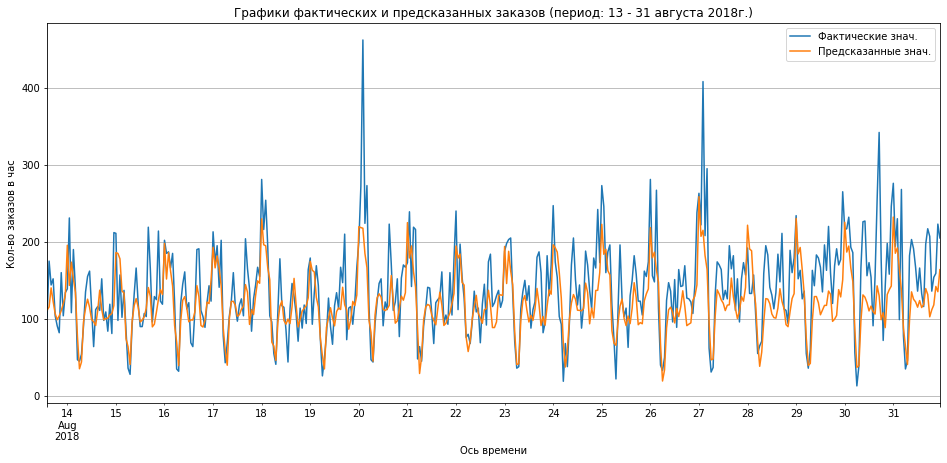

In [37]:
Y_test.rename('Фактические знач.').plot(figsize=(16, 7), legend=True, grid=True)
pd.Series(data=prediction, index=Y_test.index).rename('Предсказанные знач.').plot(figsize=(16, 7), legend=True, grid=True)
plt.title('Графики фактических и предсказанных заказов (период: 13 - 31 августа 2018г.)')
plt.ylabel('Кол-во заказов в час')
plt.xlabel('Ось времени');

Значение RSME на тестовой выборке составило 43, что немного хуже чем на валидационной, но в рамках заданного показателя. Приведенный график иллюстритрует, что прогнозируемые значения коррелируют с фактичесими, значит модель адекватна и может быть использована в работе. Большую часть временного ряда получается предсказать, за исключение выбросов.

## Основные выводы

Были загружены данные с начала марта 2018 по конец августа. Данные были проверены на пропуски и монотонность. Пропуски отсутствуют, данные расположены в хронологическом порядке. Исходный датасет был перегруппирован: новый временной интервал 1 час. Все объекты за этот период были объединены и заказы просуммированы. Дубликаты и пропуски данных - отсутствовали. Хронологичный порядок соблюден в течение всего периода: 1 марта 2018 - 31 августа 2018. И

Анализ данных. Тренды, помимо пульсаций, имеют прослеживаемый линейный рост. Сезонность имеет одинаковую повторяемость: суточную, недельную и месячную, но в слабо выраженная. Определили дневную сезонность - максимальная загрузка в понедельник, минимальная загрузка - суббота, очен хороший спрос в пятницу. Определили суточную сезонность - максимальная загрузка в районе 00:00, спад до ~06:00 (минимальная загрузка), с дальнейшем не плавным ростом до 00:00. Про месячную сезонность - нельзя ничего говорить, данные не за полный год. Определили тренд - рост с каждым месяцем. Но данные не полные, рост может быть связан с временем года.

Это позволило определить перечень признаков и их размеры:

сдвиг (количество заказов за 2 предыдущих часов);

скользящее среднее (среднее количество заказов за 3 ближайших часа);

месяц;

день месяца;

день недели;

час.

Получившаяся выборка относительно небольшая и для подбора гиперпараметров моделей использовалась кросс вылидация, с учётом хронологического порядка. Были обучены четыре модели:

Линейная регрессия (Linear Regression);

Случайный лес (Random Forest Regressor);

Модель градиентный бустинг (Light GBM), которая показала себя лучшей;

Модель CatBoost.

Результат на тестовой выборке: время обучения 3 мс. и предсказания 30 мс., RMSE: 43. Большую часть временного ряда получается предсказать, за исключение выбросов. Приведенный в работе график иллюстритрует, что прогнозируемые значения коррелируют с фактичесими, значит модель адекватна и может быть использована в работе.